In [1]:
import iminuit
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import matplotlib.pylab as plt
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import corner
import sys
sys.path.insert(1, '/home/users/akatil/P-ONE/git/PONE_NuTau/Graphing/')
import plots

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
8.66986284675
Now Histogramming
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
1.63953803809
Now Histogramming
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
77.4139987714
Now Histogramming
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
4.99607299067
Now Histogramming
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
8.36413042023
Now Histogramming
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
48.56350

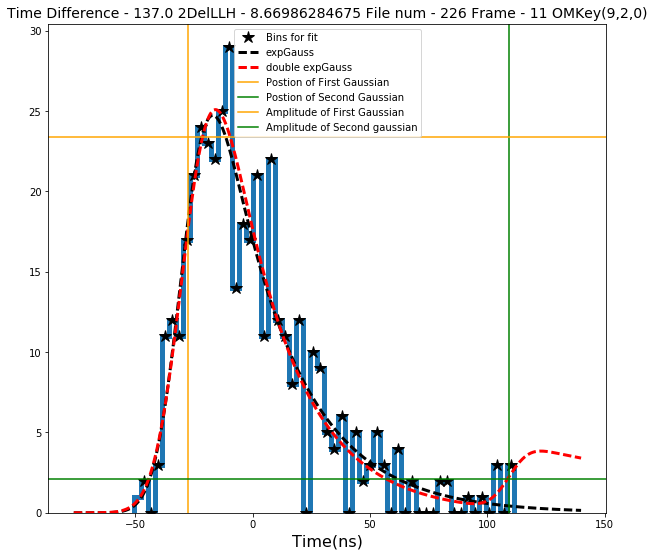

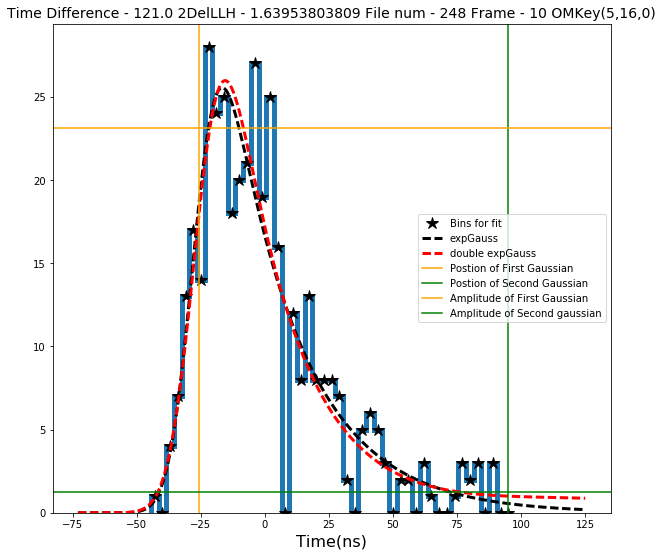

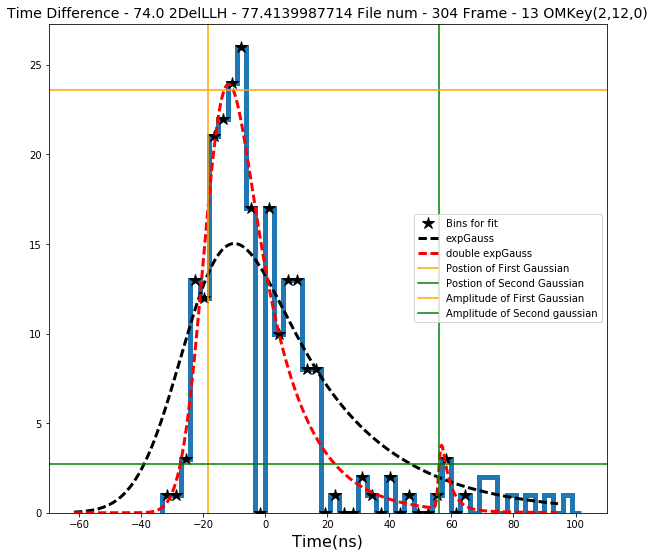

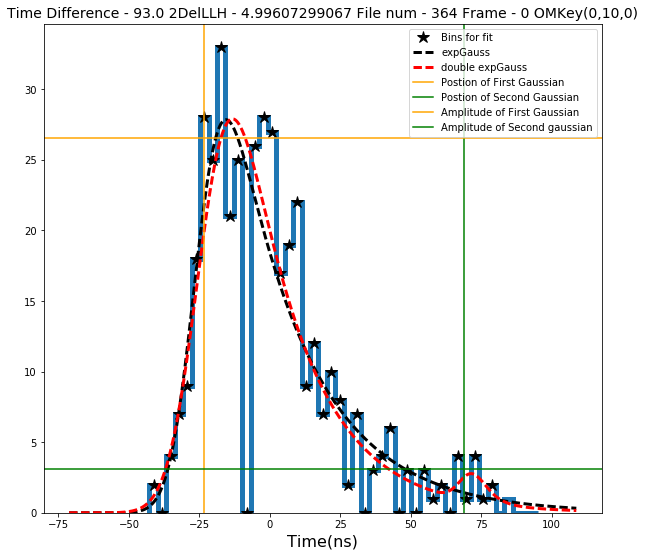

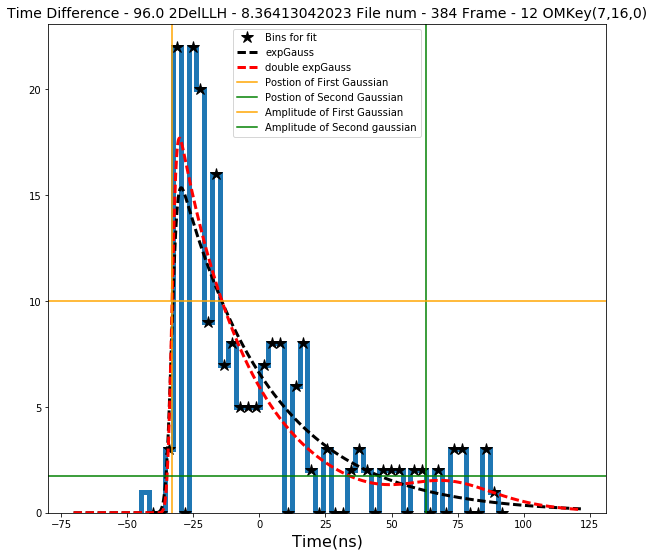

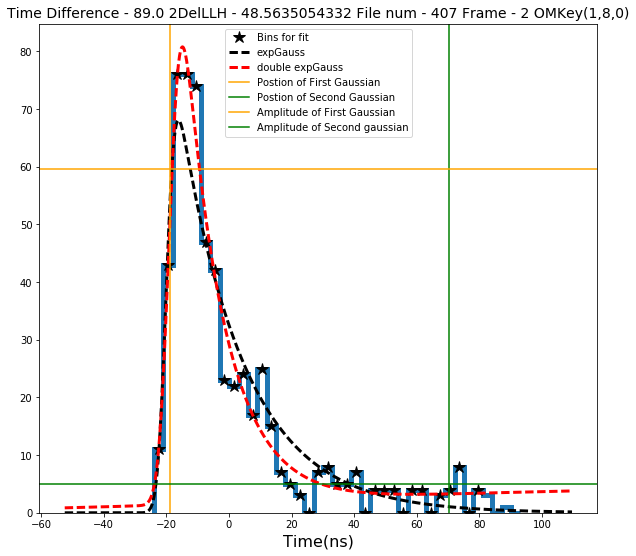

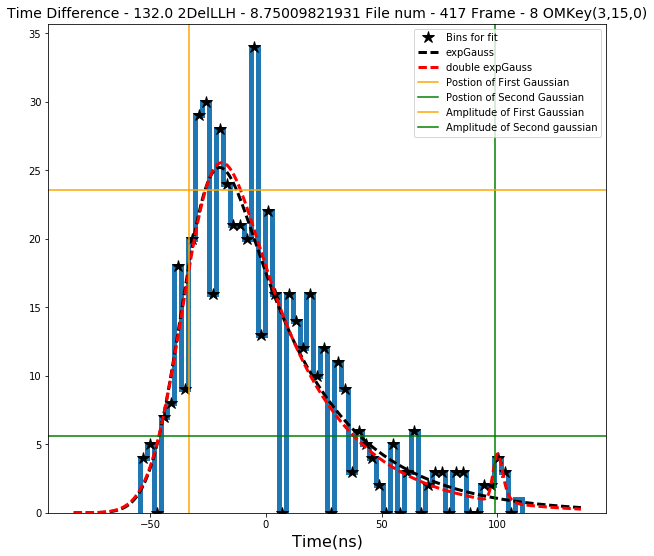

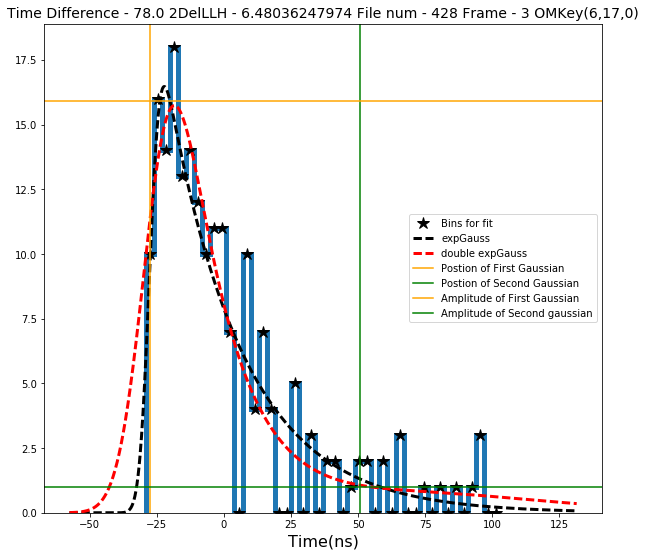

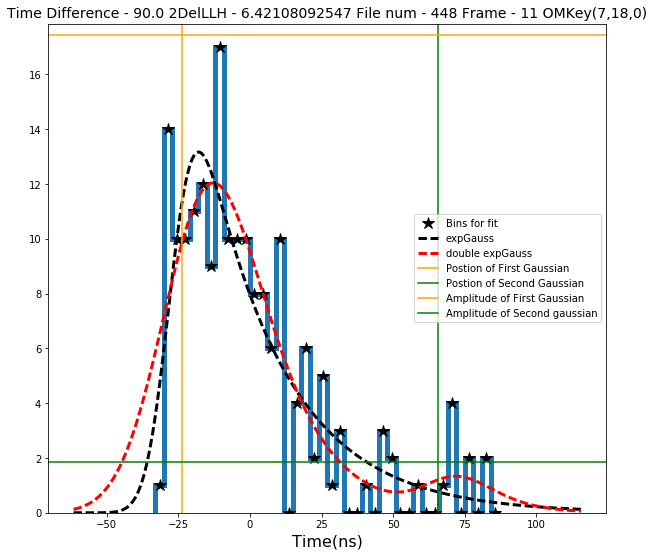

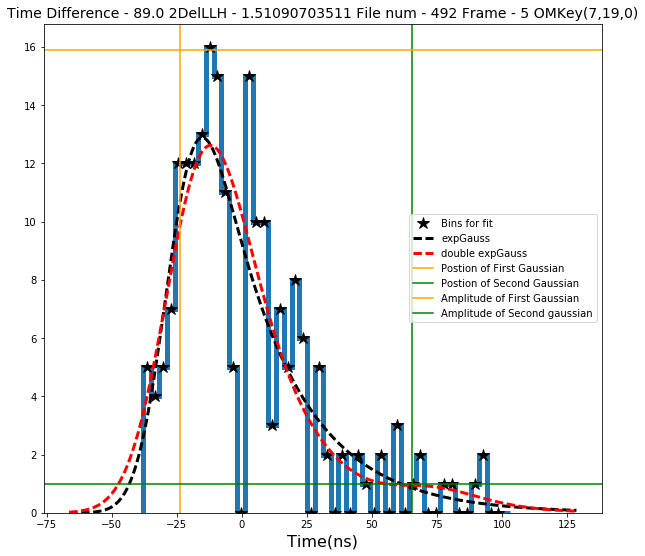

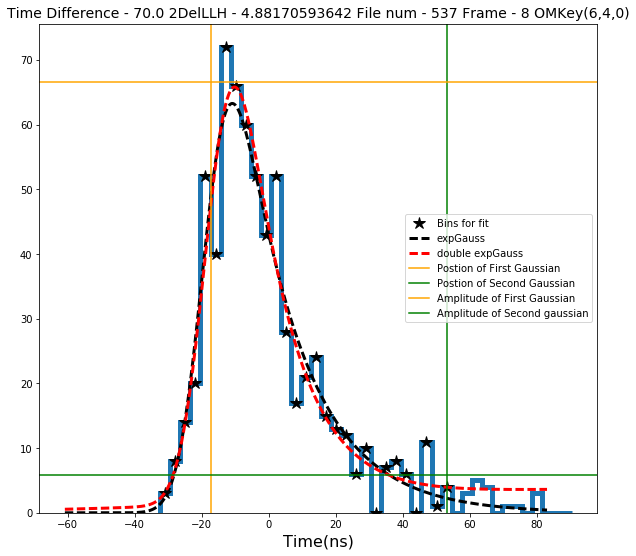

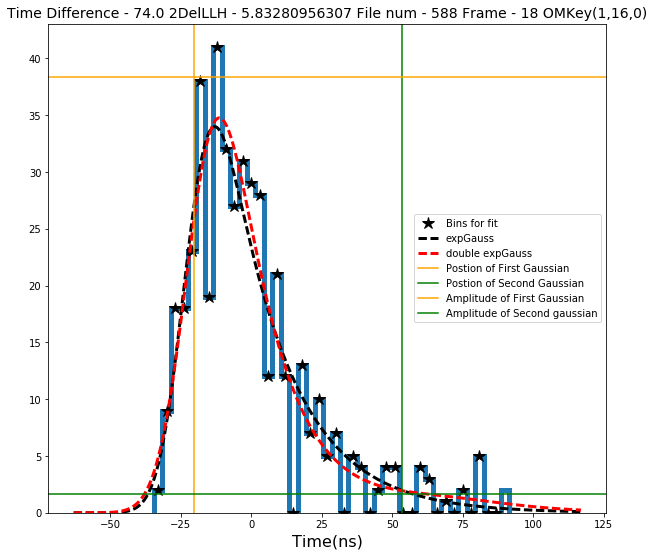

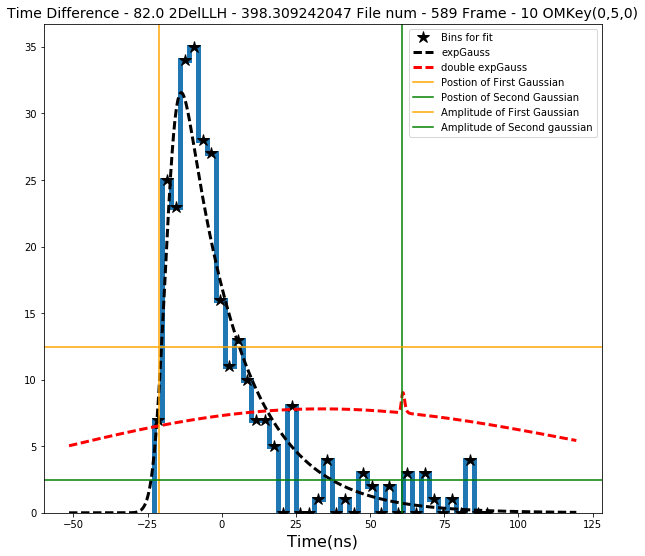

In [2]:
'''
Reading the output file
'''
timeDifferences_t = ([])
timeDifferences_e = ([])

ampRatio_t = ([])
ampRatio_e = ([])

widthRatio_t = ([])
widthRatio_e = ([])

skewnessRatio_t = ([])
skewnessRatio_e = ([])

LRR_t = ([])
LRR_e = ([])

for i in range(200, 600):
    print(i)
    readFile = dataio.I3File('/data/p-one/akatil/step_6_analysis/NuTau_NuE_20Events_expGauss_update1/step_6_'+str(i)+'_parameters.i3.gz')
    frame_num = 0
    for frame in readFile:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        params = frame['Parameters_doublePeak']
        params_single = frame['Parameters_biGauss']
        recoPulseMap = frame['I3RecoPulses']
        
        for omkey in params.keys():
            recoPulseList = recoPulseMap[omkey]
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
            vals = params[omkey]
            vals_single = params_single[omkey]
            
            tDiff = abs(vals[5]-vals[1])
            wRatio = abs(vals[2]-vals[6])
            aRatio = vals[4]/vals[8]
            lRatio = 2*abs(vals_single[0]-vals[0])
            skewRatio = abs(vals[3]-vals[7])
            
            if vals[0] != vals[0] or vals_single[0]!=vals_single[0]:
                print('Found a nan')
                print(vals_single[0], vals[0])
            
            if lepton.type == 15 or lepton.type == -15:
                timeDifferences_t = np.append(timeDifferences_t, tDiff)
                widthRatio_t = np.append(widthRatio_t, wRatio)
                #plots.plot_condition(tDiff>70, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey, lRatio)
                ampRatio_t = np.append(ampRatio_t, aRatio)
                LRR_t = np.append(LRR_t, lRatio)
                skewnessRatio_t = np.append(skewnessRatio_t, skewRatio)
            else:
                timeDifferences_e = np.append(timeDifferences_e, tDiff)
                widthRatio_e = np.append(widthRatio_e, wRatio)
                plots.plot_condition(tDiff>70, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey, lRatio)
                ampRatio_e = np.append(ampRatio_e, aRatio)
                LRR_e = np.append(LRR_e, lRatio)
                skewnessRatio_e = np.append(skewnessRatio_e, skewRatio)
        frame_num = frame_num+1

Will plot some pretty plots using corner and matplotlib.pyplot
(2117, 2117, 2117, 2117, 2117)
(3649, 3649, 3649, 3649, 3649)


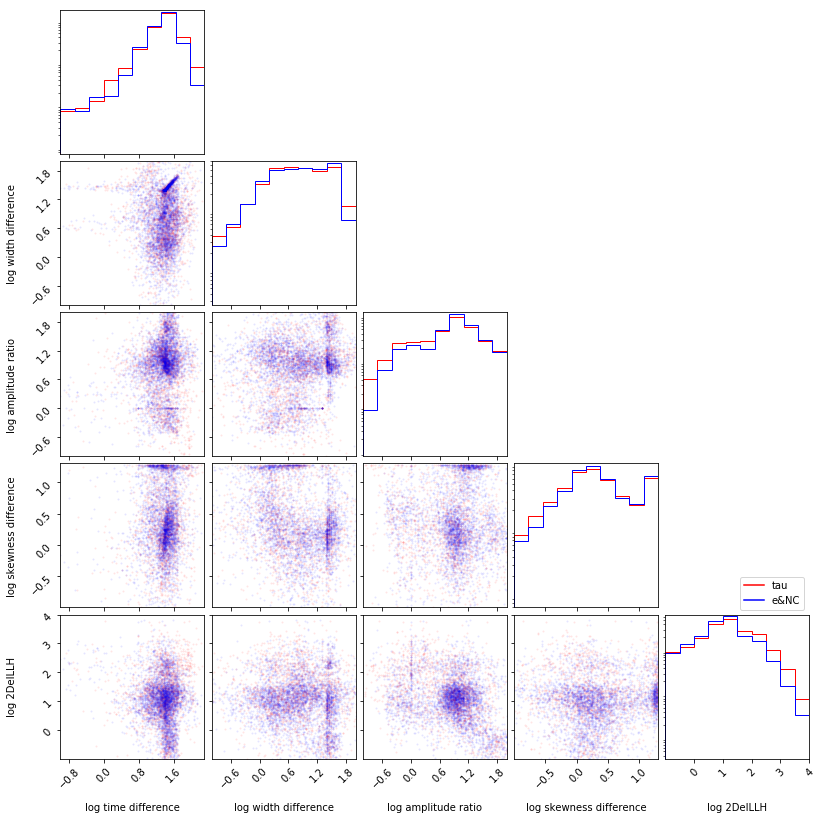

([0.1, 200.0], [0.1, 100.0], [0.1, 20], [0.1, 100.0], [0.1, 10000.0])
((100,), (100,), (100,), (50,), (100,))
((2117,), (2117,))


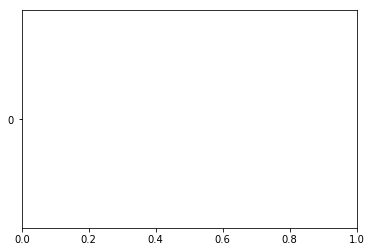

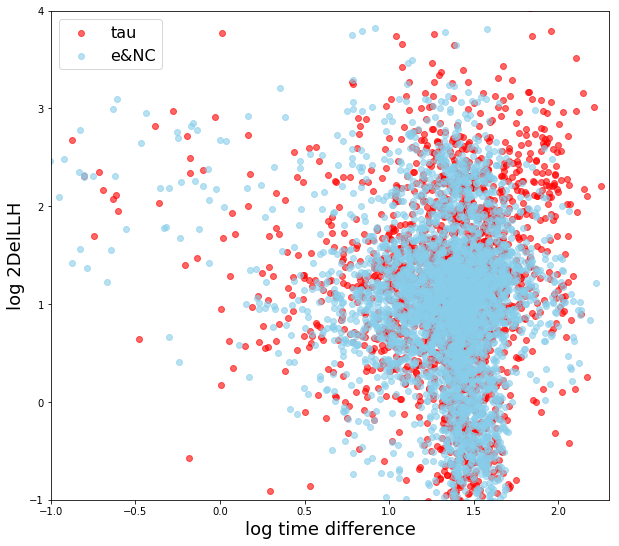

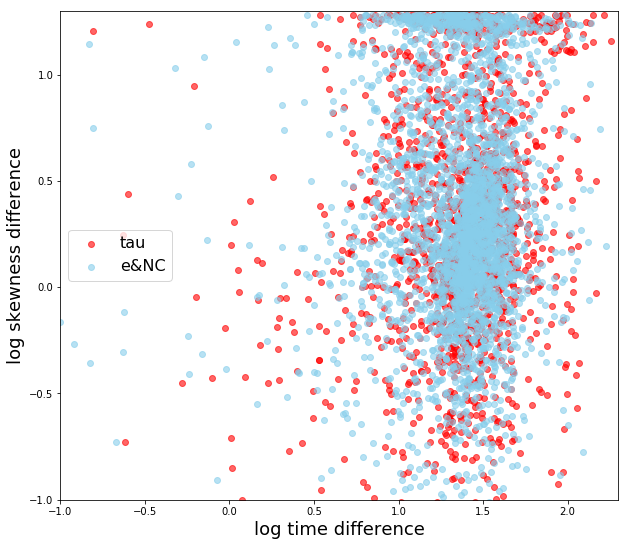

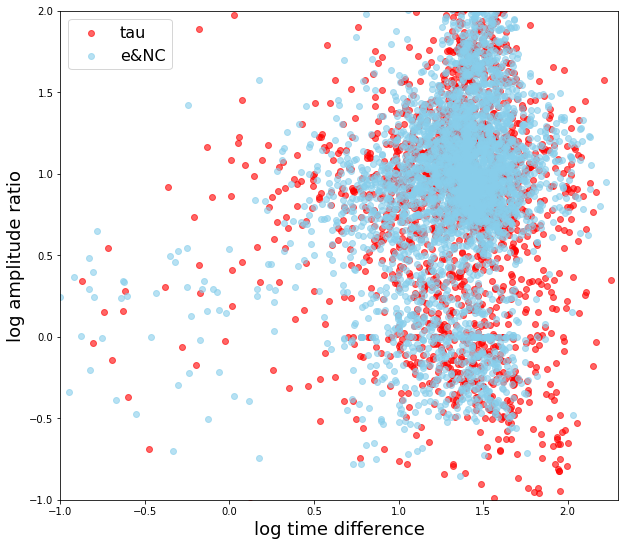

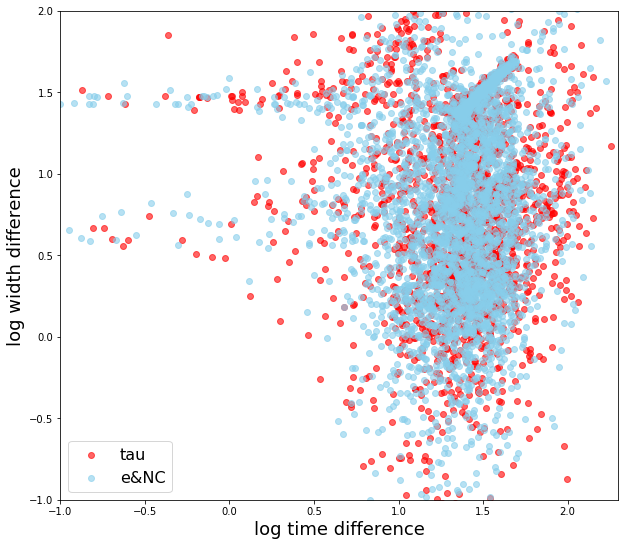

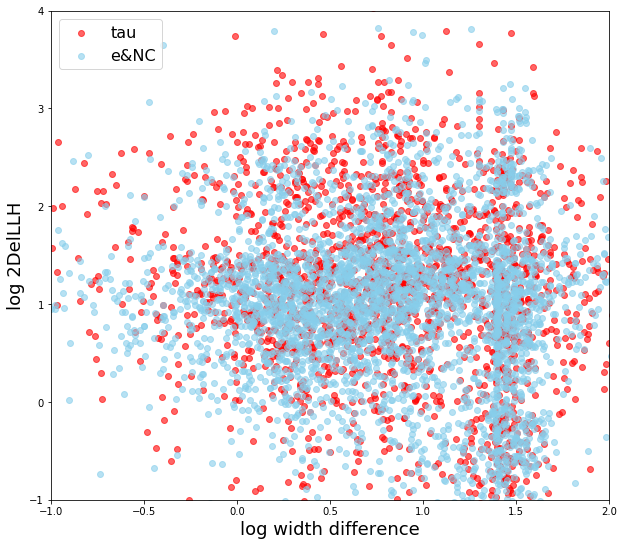

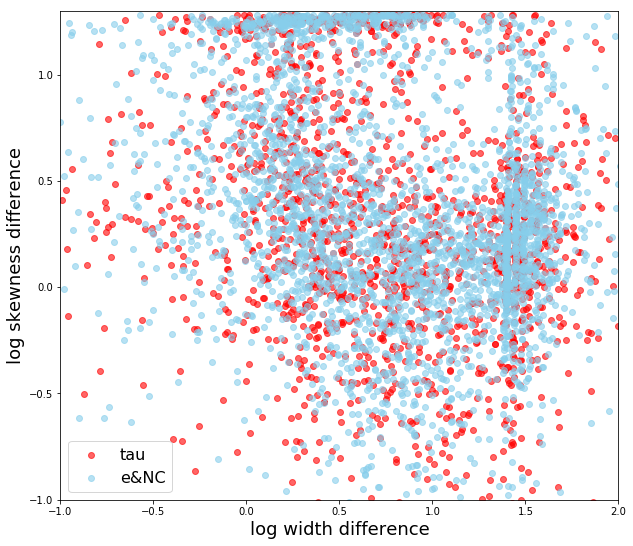

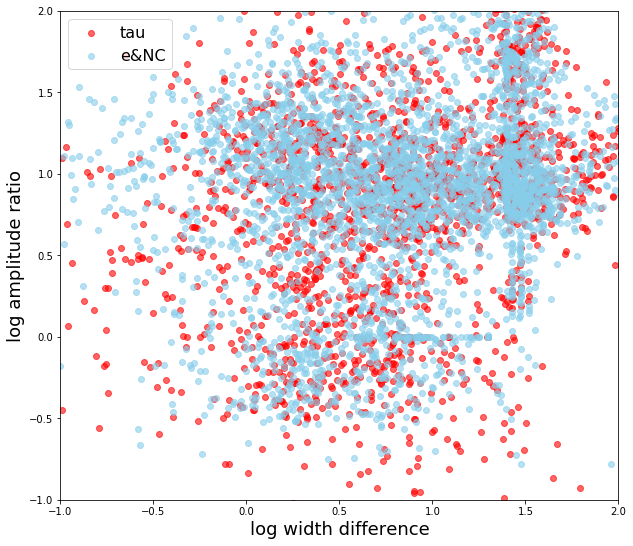

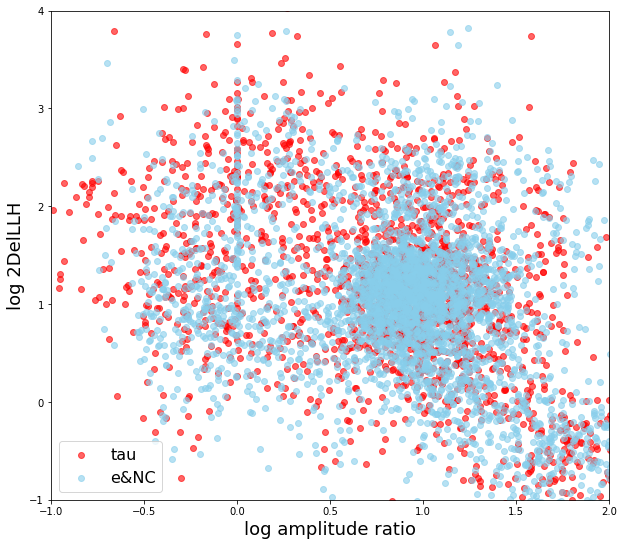

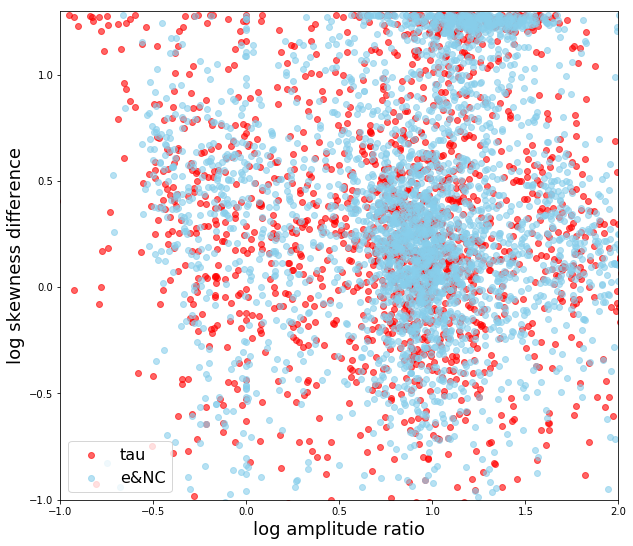

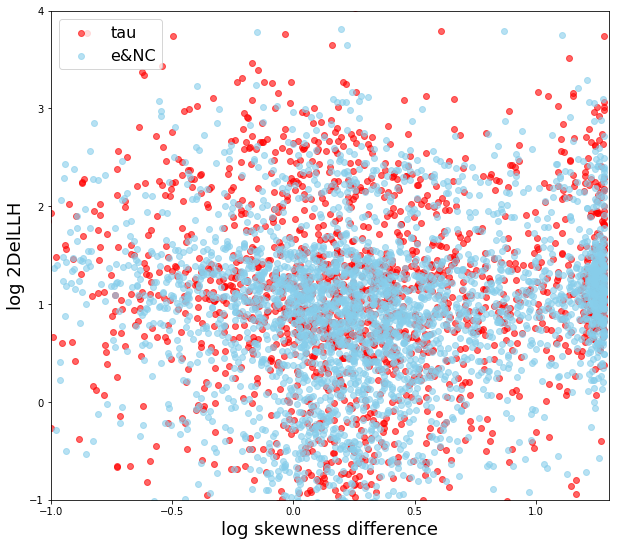

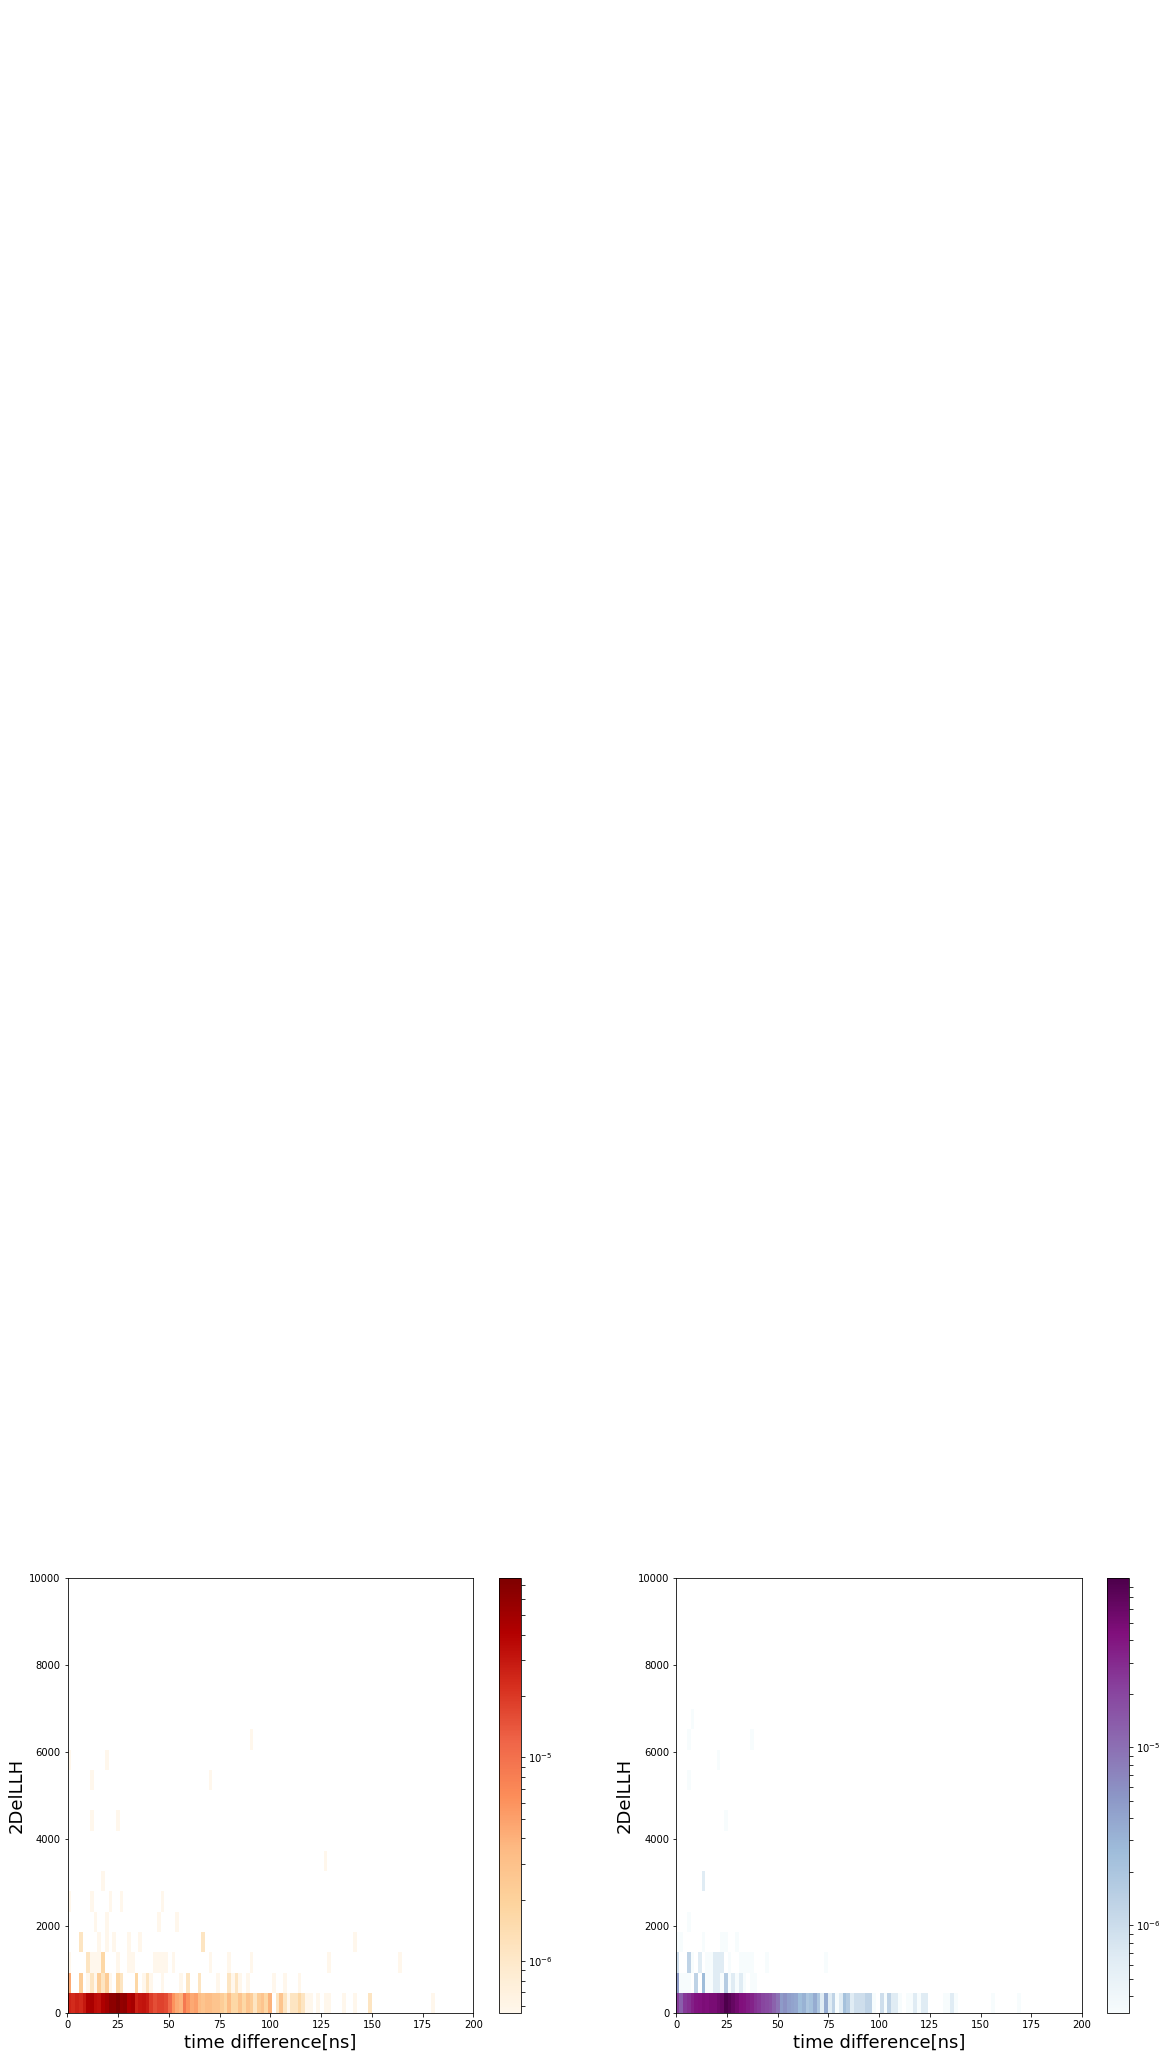

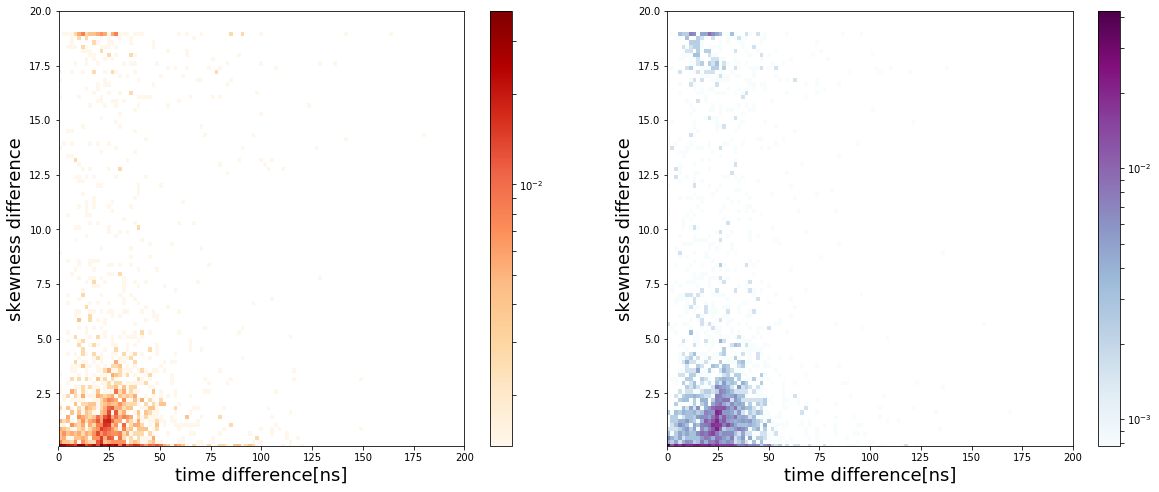

ValueError: Image size of 1155x115156 pixels is too large. It must be less than 2^16 in each direction.

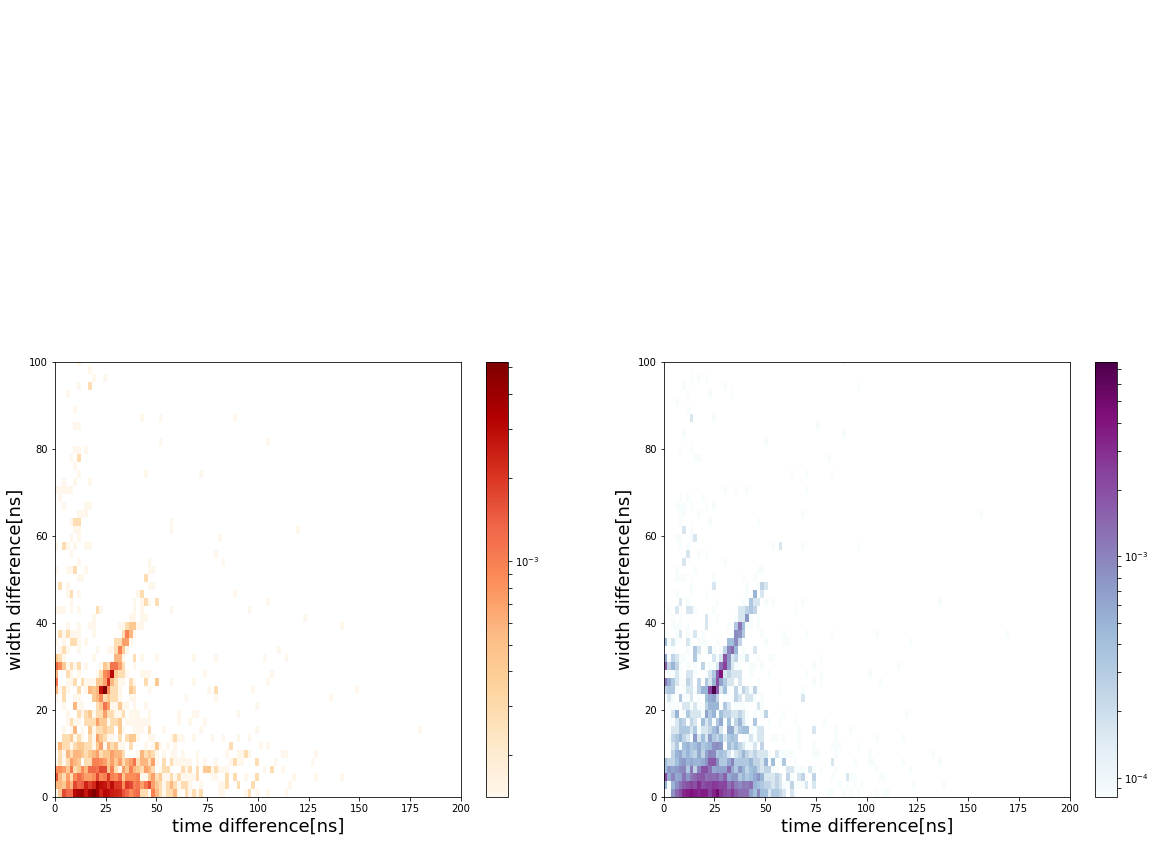

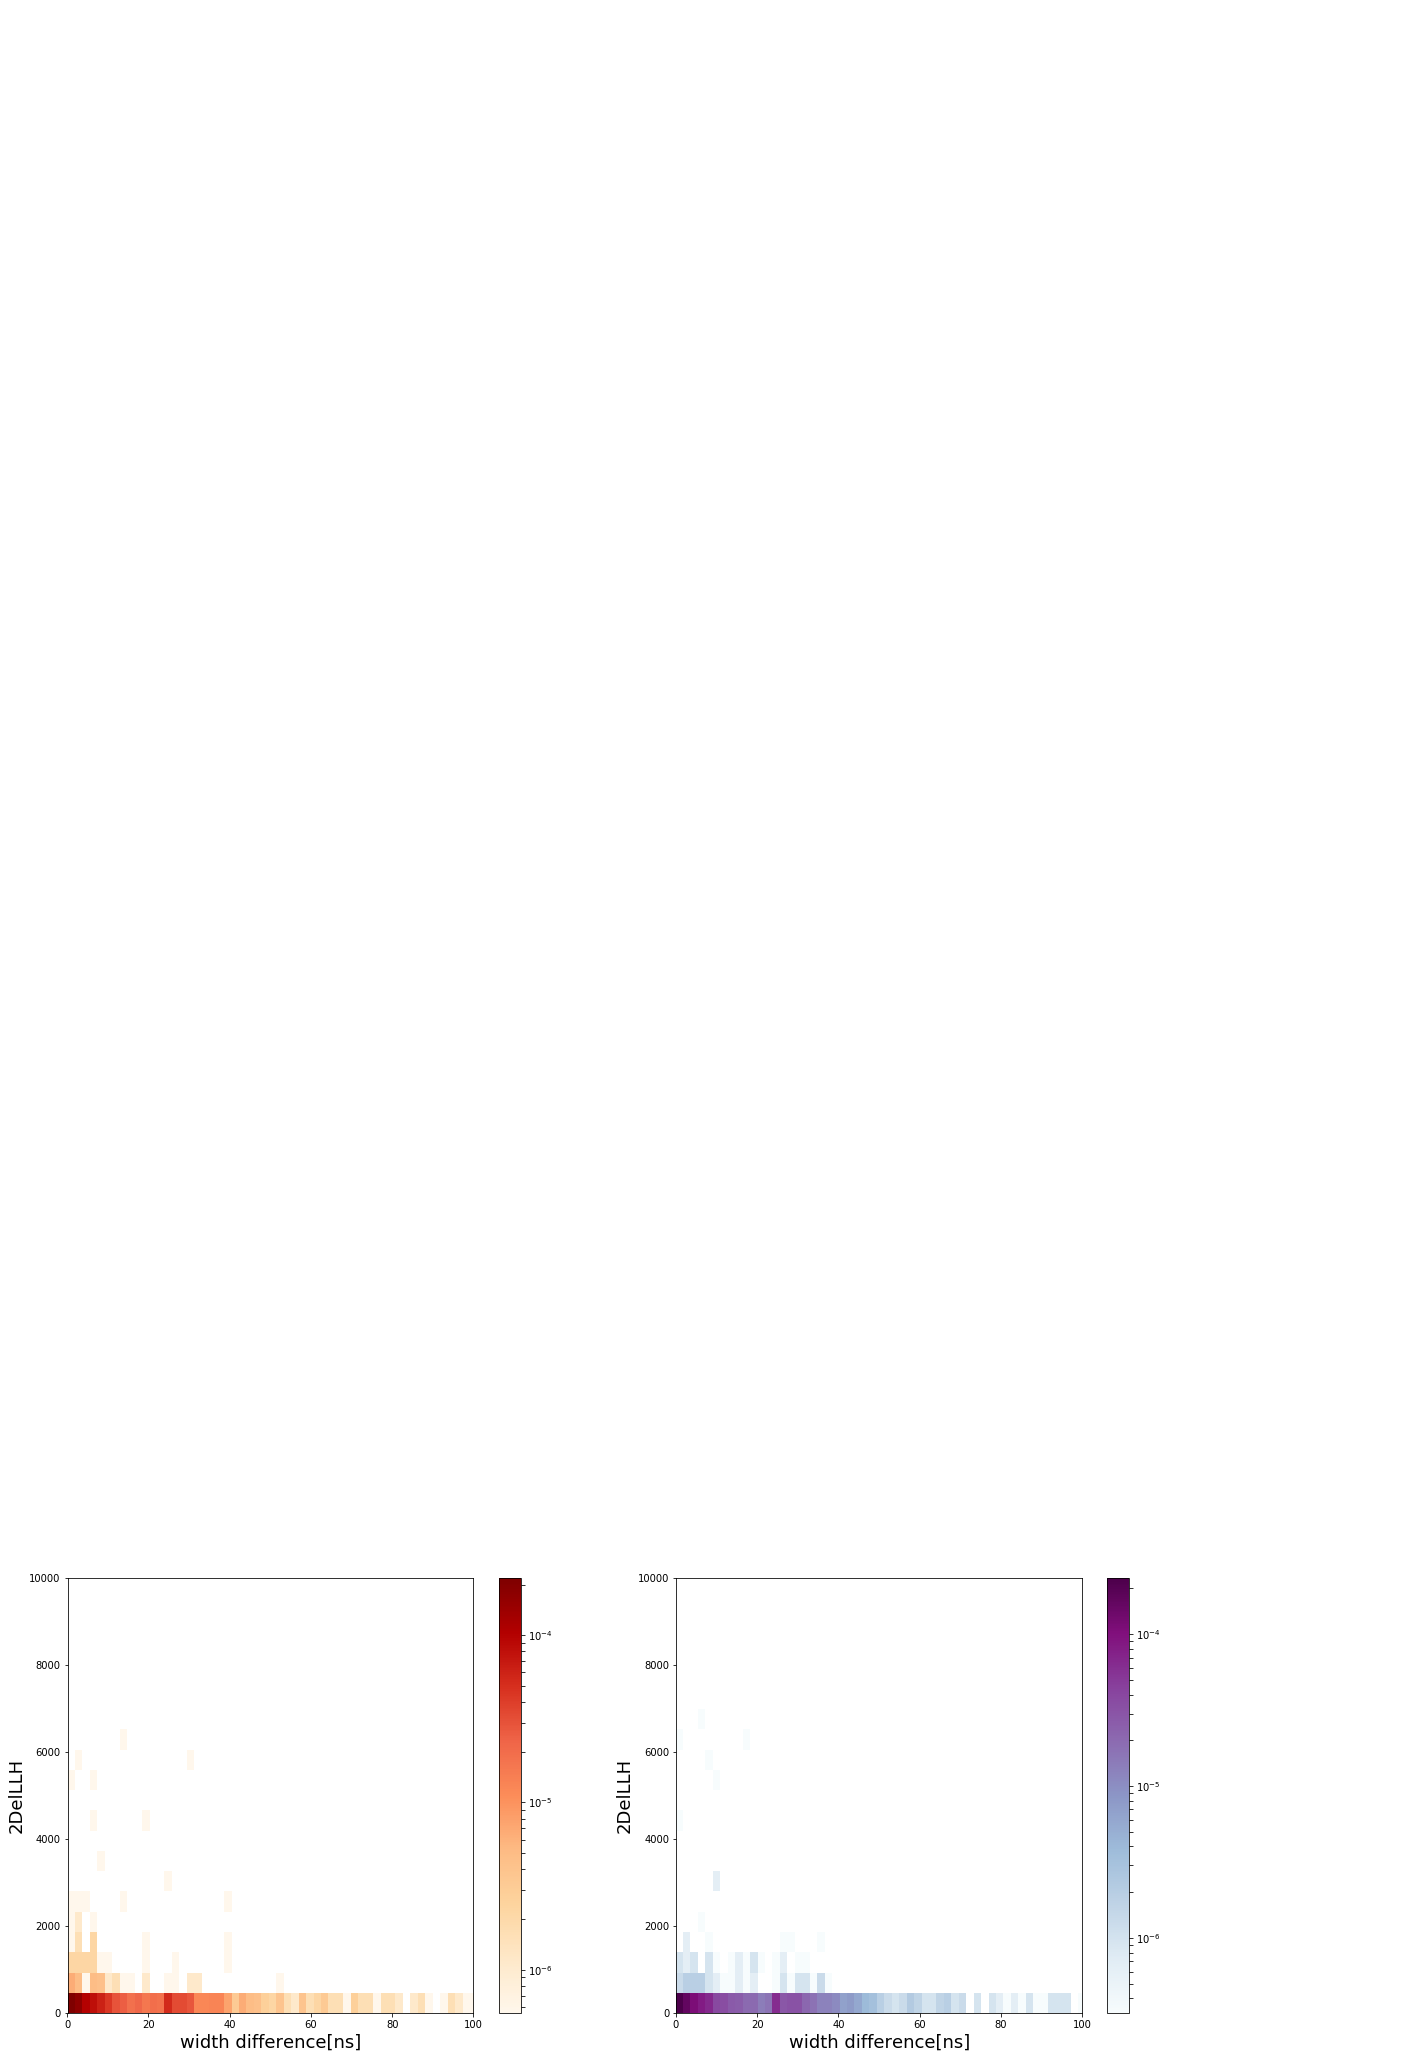

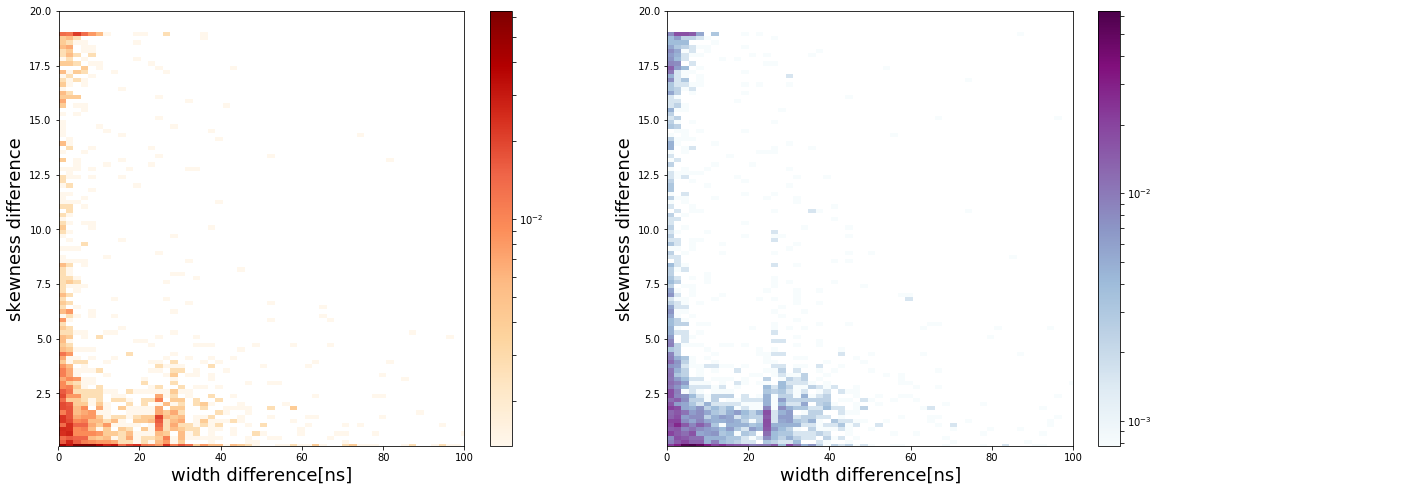

ValueError: Image size of 1408x115156 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 108094x2059 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 108085x492 pixels is too large. It must be less than 2^16 in each direction.

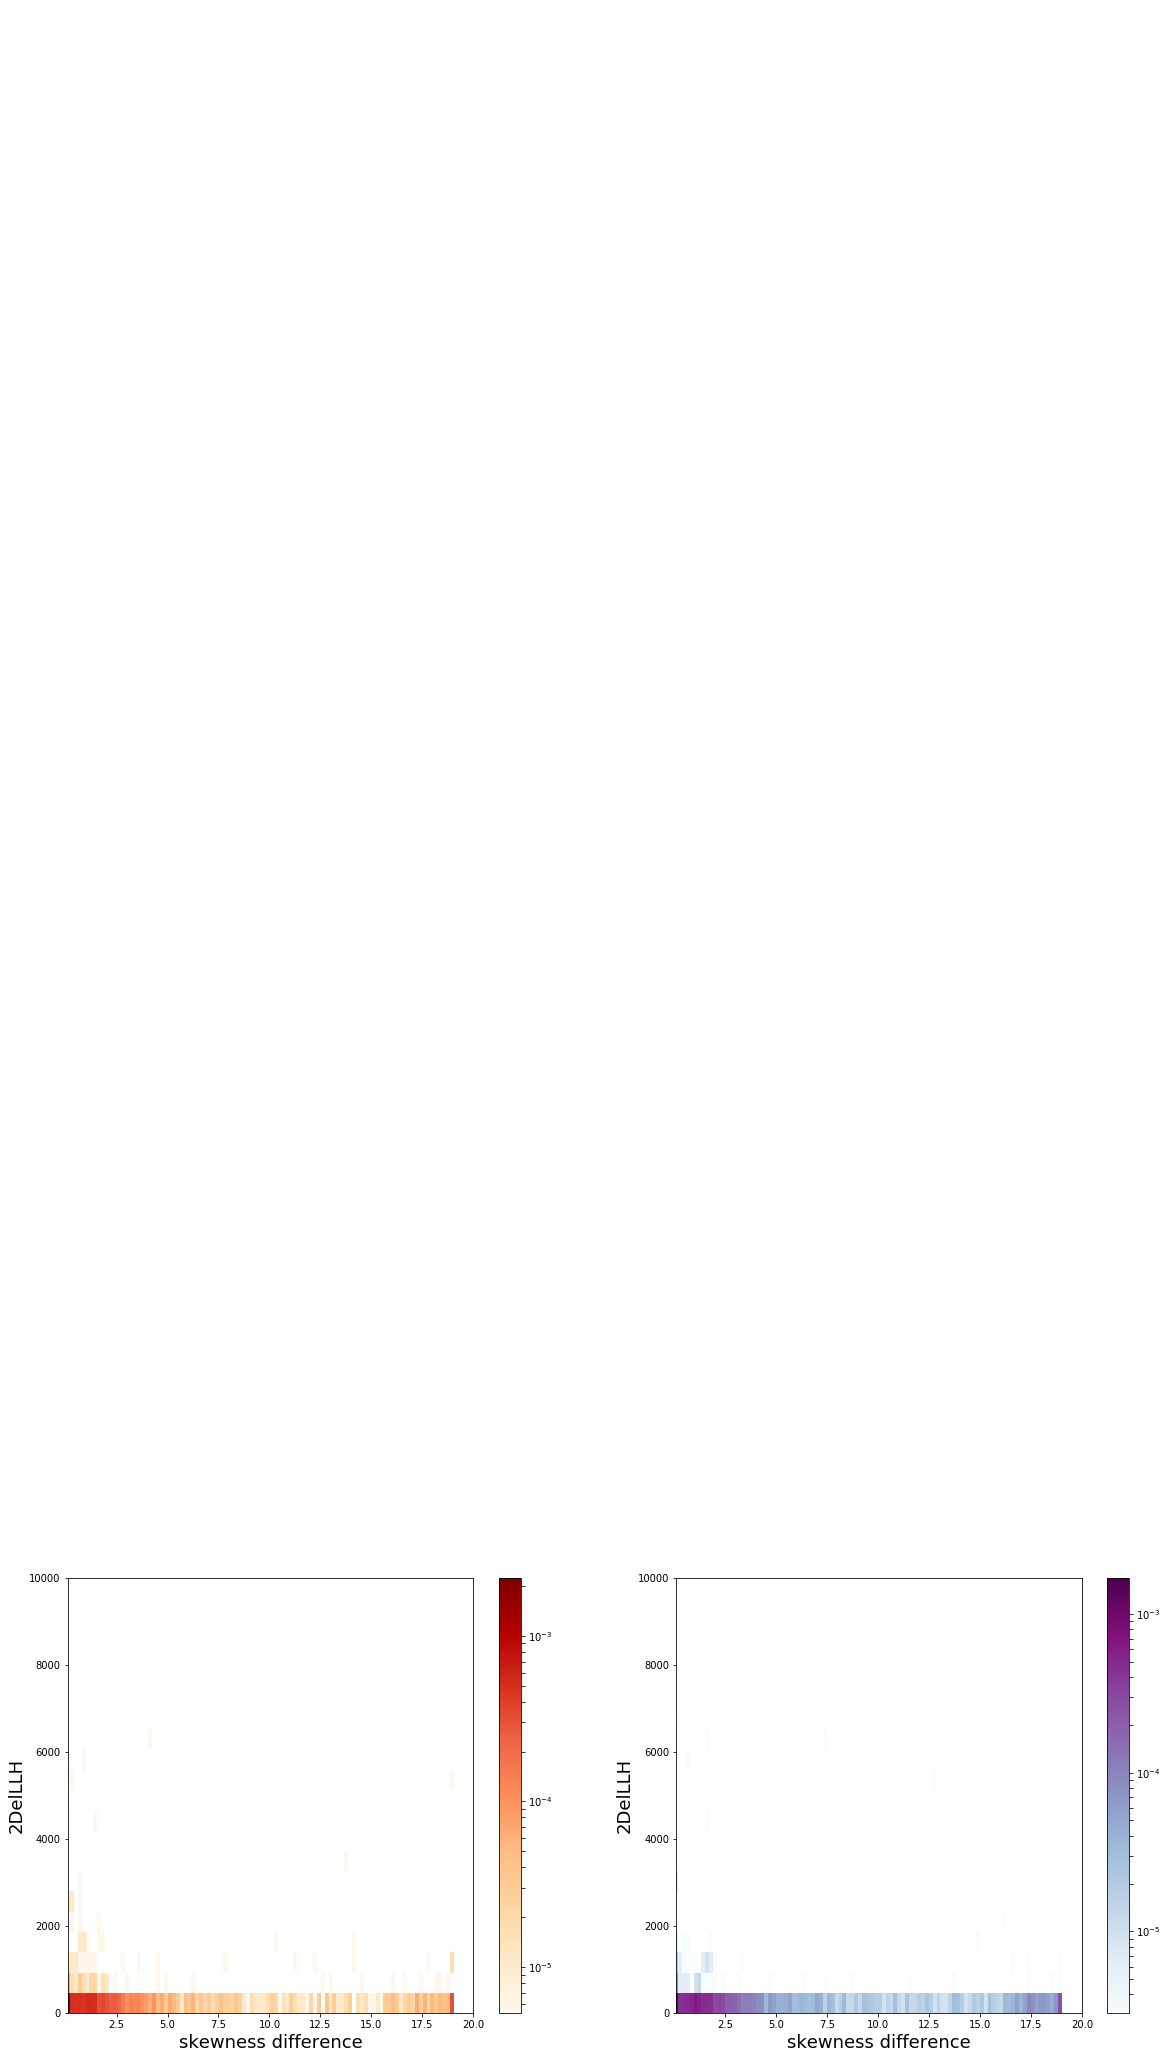

In [6]:
p = plots.plots

params = [timeDifferences_t, widthRatio_t, skewnessRatio_t, ampRatio_t, LRR_t, 
          timeDifferences_e, widthRatio_e, skewnessRatio_e, ampRatio_e, LRR_e]

p = plots.plots(params)

p.corner(log_all=True, range_time=[1e-1, 2e2], range_amp=[1e-1, 1e2], range_skew=[1e-1, 20], range_LLH=[1e-1, 1e4], range_wid=[1e-1, 1e2],
        numBins_time=10, numBins_amp=10,numBins_LLH=10)
plt.yscale('symlog')
p.scatter(log_all=True, range_time=[1e-1, 2e2], range_amp=[1e-1, 1e2], range_skew=[1e-1, 20], range_LLH=[1e-1, 1e4], range_wid=[1e-1, 1e2])
p.hist2d(log_all=False,
         range_time=[1e-1, 2e2], range_amp=[1e-1, 1e2], range_skew=[1e-1, 20], range_LLH=[1e-1, 1e4], range_wid=[1e-1, 1e2],
        numBins_time=100, numBins_amp=50, numBins_LLH=100, numBins_wid=100, numBins_skew=100)